In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr as prs

# Data Bencana

In [4]:
df = pd.read_csv('dataset/data_bencana_2018-2022.csv', delimiter = ';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22337 entries, 0 to 22336
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Data Bencana  22337 non-null  object
 1   Unnamed: 1    18471 non-null  object
 2   Unnamed: 2    22337 non-null  object
 3   Unnamed: 3    22337 non-null  object
 4   Unnamed: 4    22337 non-null  object
 5   Unnamed: 5    18210 non-null  object
 6   Unnamed: 6    22337 non-null  object
 7   Unnamed: 7    22337 non-null  object
 8   Unnamed: 8    22337 non-null  object
 9   Unnamed: 9    13271 non-null  object
 10  Unnamed: 10   15091 non-null  object
 11  Unnamed: 11   14882 non-null  object
 12  Unnamed: 12   15252 non-null  object
 13  Unnamed: 13   22336 non-null  object
 14  Unnamed: 14   16671 non-null  object
 15  Unnamed: 15   22337 non-null  object
dtypes: object(16)
memory usage: 2.7+ MB


In [6]:
# Define the new column names
new_column_names = [
    'No',
    'Kode Identitas Bencana',
    'ID Kabupaten',
    'Tanggal Kejadian',
    'Kejadian',
    'Lokasi',
    'Kabupaten',
    'Provinsi',
    'Kronologi & Dokumentasi',
    'Penyebab',
    'Meninggal',
    'Hilang',
    'Terluka',
    'Rumah Rusak',
    'Rumah Terendam',
    'Fasum Rusak'
]

# Rename the columns
df.columns = new_column_names

In [7]:
df = df.drop(index = [0], axis = 0)
df = df.drop('Lokasi', axis=1)

In [8]:
df['Meninggal'] = df['Meninggal'].fillna(0)
df['Terluka'] = df['Terluka'].fillna(0)
df['Hilang'] = df['Hilang'].fillna(0)
df['Rumah Terendam'] = df['Rumah Terendam'].fillna(0)

In [12]:
df = df.drop('Kronologi & Dokumentasi', axis = 1)

In [13]:
df['Penyebab'] = df['Penyebab'].fillna('Belum Diketahui')

In [14]:
df

,No,Kode Identitas Bencana,ID Kabupaten,Tanggal Kejadian,Kejadian,Kabupaten,Provinsi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
1,1,7403 105 2022 012 031 1,7403,31/12/22,PUTING BELIUNG,KONAWE,SULAWESI TENGGARA,Dipicu hujan dengan intesitas tinggi disertai ...,0,0,0,4,0,0
2,2,3326 101 2022 012 031 1,3326,31/12/22,BANJIR,PEKALONGAN,JAWA TENGAH,Dipicu hujan dengan intensitas tinggi dengan d...,0,0,0,0,5082,0
3,3,3315 101 2022 012 031 1,3315,31/12/22,BANJIR,GROBOGAN,JAWA TENGAH,Dipicu hujan dengan intersiatas tinggi,1,0,0,0,2881,1
4,4,3319 101 2022 012 031 1,3319,31/12/22,BANJIR,KUDUS,JAWA TENGAH,Dipicu hujan dengan intensitas tinggi,0,0,0,0,44713,0
5,5,5314 105 2022 012 031 1,5314,31/12/22,PUTING BELIUNG,ROTE NDAO,NUSA TENGGARA TIMUR,Dipicu angin kencang,0,0,0,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22332,22332,5105102201801010,5105,01/01/18,TANAH LONGSOR,KLUNGKUNG,BALI,Belum Diketahui,0,0,0,1,0,0
22333,22333,5103101201801010,5103,01/01/18,BANJIR,BADUNG,BALI,Belum Diketahui,0,0,0,0,3,0
22334,22334,5106102201801010,5106,01/01/18,TANAH LONGSOR,BANGLI,BALI,Belum Diketahui,0,0,0,1,0,0
22335,22335,1108101201801010,1108,01/01/18,BANJIR,ACEH BESAR,ACEH,Belum Diketahui,0,0,0,0,28,0


In [10]:
# csv_file_path = 'output.csv'  # Replace with your desired file path and name

# # Export the DataFrame to a CSV file
# df.to_csv(csv_file_path, index=False)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [12]:
frek_bencana = df['Kejadian'].value_counts().reset_index()
frek_bencana.columns = ['Kejadian', 'frekuensi']

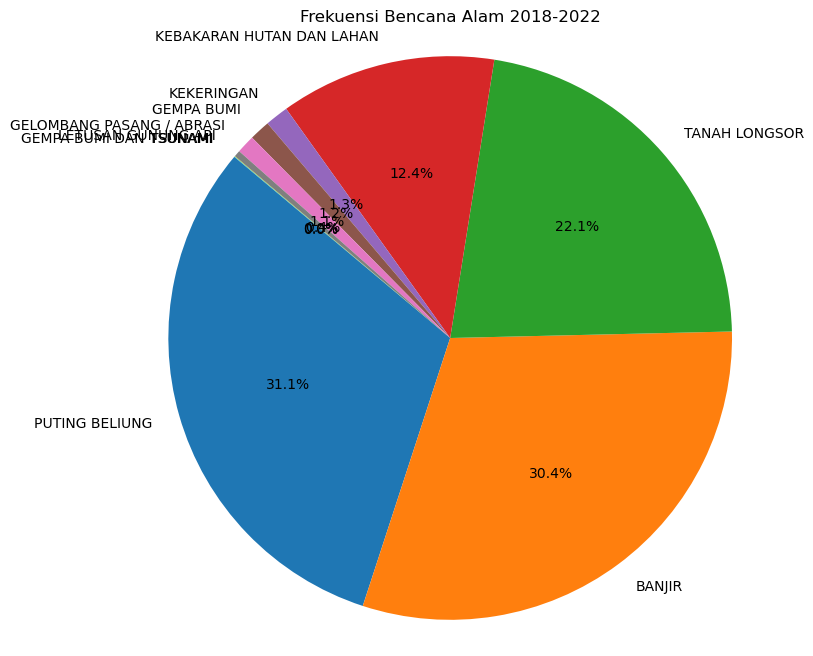

In [13]:
# pie chart frek_bencana yang tercatat
plt.figure(figsize=(8,8))
plt.pie(frek_bencana['frekuensi'], labels=frek_bencana['Kejadian'], autopct = '%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Frekuensi Bencana Alam 2018-2022')
plt.show()

# Analisis Banjir
#### Dari sini akan dilihat banjir per provinsi dan analisis penyebabnya

In [16]:
banjir = df.loc[df['Kejadian'] == 'BANJIR']
banjir = banjir.drop('No', axis=1).reset_index(drop = True)

In [26]:
banjir['Provinsi'] = banjir['Provinsi'].str.title()
banjir['Provinsi'] = banjir['Provinsi'].replace( {'Di Yogyakarta' : 'Yogyakarta', 'Dki Jakarta' : 'Jakarta Raya'})

In [28]:
banjir.to_csv('cleaned_dataset/data_banjir.csv', index = False)

In [27]:
banjir.head()

,Kode Identitas Bencana,ID Kabupaten,Tanggal Kejadian,Kejadian,Kabupaten,Provinsi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
0,3326 101 2022 012 031 1,3326,31/12/22,BANJIR,PEKALONGAN,Jawa Tengah,Dipicu hujan dengan intensitas tinggi dengan d...,0,0,0,0,5082,0
1,3315 101 2022 012 031 1,3315,31/12/22,BANJIR,GROBOGAN,Jawa Tengah,Dipicu hujan dengan intersiatas tinggi,1,0,0,0,2881,1
2,3319 101 2022 012 031 1,3319,31/12/22,BANJIR,KUDUS,Jawa Tengah,Dipicu hujan dengan intensitas tinggi,0,0,0,0,44713,0
3,3321 101 2022 012 031 1,3321,31/12/22,BANJIR,DEMAK,Jawa Tengah,dipicu hujan dengan intesitas tinggi disertai ...,0,0,0,109,39240,0
4,3318 101 2022 012 031 1,3318,31/12/22,BANJIR,PATI,Jawa Tengah,Dipicu hujan dengan intensitas tinggi sehingg...,0,0,0,0,6301,0


In [15]:
grouped_data = banjir['Provinsi'].value_counts().reset_index()
grouped_data.columns = ['Provinsi', 'frekuensi']
grouped_data = grouped_data.sort_values(by='frekuensi', ascending=False)

<function matplotlib.pyplot.show(close=None, block=None)>

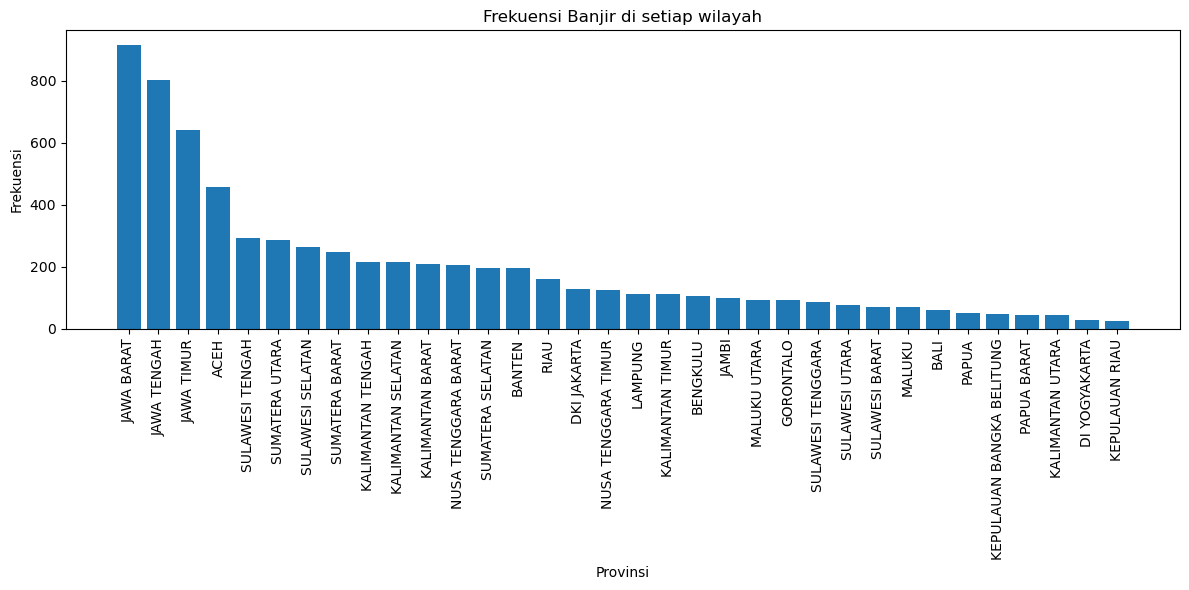

In [16]:
plt.figure(figsize=(12,6))
plt.bar(grouped_data['Provinsi'], grouped_data['frekuensi'])
plt.xlabel('Provinsi')
plt.ylabel('Frekuensi')
plt.title('Frekuensi Banjir di setiap wilayah')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show

In [17]:
banjir = df.loc[df['Kejadian'] == 'BANJIR'].copy()

In [18]:
banjir['Tanggal Kejadian'] = pd.to_datetime(banjir['Tanggal Kejadian'], format='%d/%m/%y')

In [19]:
tren_bulanan = banjir.groupby(banjir['Tanggal Kejadian'].dt.to_period('M')).size().reset_index(name='frekuensi')

In [20]:
tren_bulanan.index = tren_bulanan['Tanggal Kejadian'].dt.to_timestamp()

In [21]:
tren_tahunan = banjir.groupby(banjir['Tanggal Kejadian'].dt.to_period('Y')).size().reset_index(name='frekuensi')

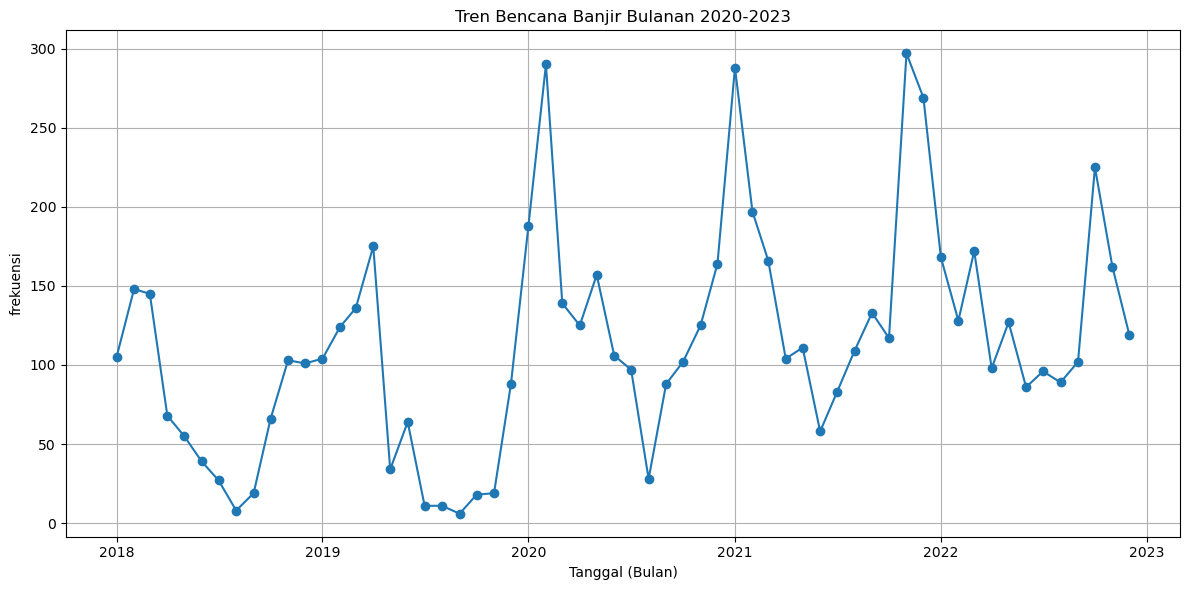

In [22]:
plt.figure(figsize=(12,6))
plt.plot(tren_bulanan.index, tren_bulanan['frekuensi'], marker='o')
plt.xlabel('Tanggal (Bulan)')
plt.ylabel('frekuensi')
plt.title('Tren Bencana Banjir Bulanan 2020-2023')
plt.grid()
plt.tight_layout()
plt.show()

# per kejadian ae

# Analisis Tanah Longsor

In [23]:
longsor = df.loc[df['Kejadian'] == 'TANAH LONGSOR']
grouped_longsor = longsor['Provinsi'].value_counts().reset_index()
grouped_longsor.columns = ['Provinsi', 'frekuensi']
grouped_longsor = grouped_longsor.sort_values(by='Provinsi')

<function matplotlib.pyplot.show(close=None, block=None)>

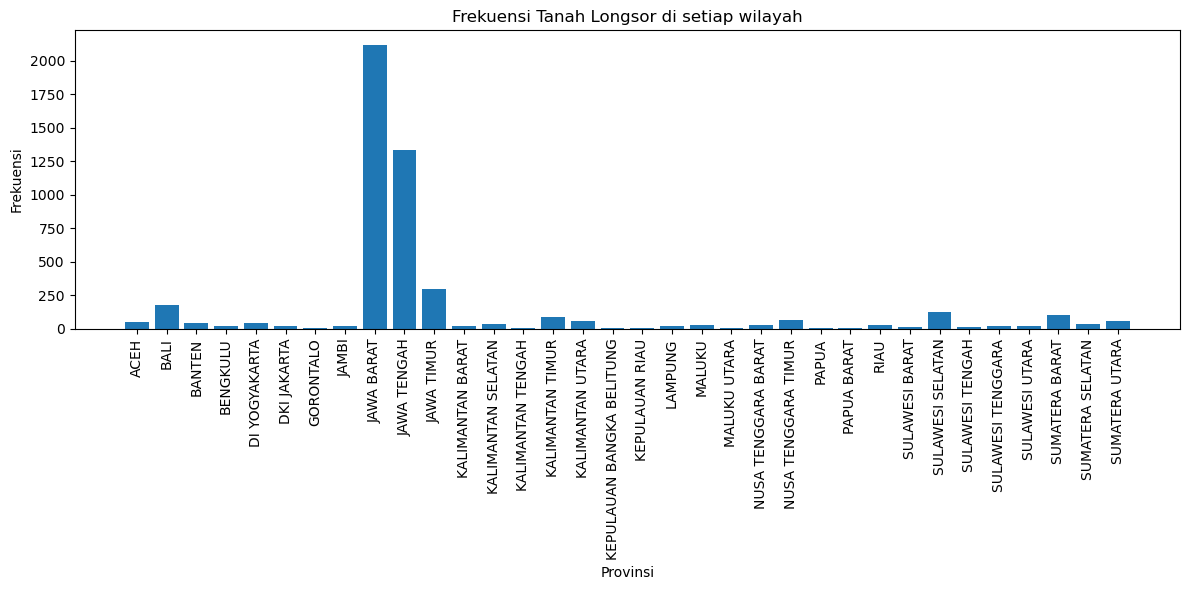

In [24]:
plt.figure(figsize=(12,6))
plt.bar(grouped_longsor['Provinsi'], grouped_longsor['frekuensi'])
plt.xlabel('Provinsi')
plt.ylabel('Frekuensi')
plt.title('Frekuensi Tanah Longsor di setiap wilayah')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show

# Analisis Data Sampah

In [22]:
df_ts = pd.read_csv('dataset/Data_Timbulan_Sampah_PerTahun_Provinsi.csv', delimiter = ';')
df_ks = pd.read_csv('dataset/Data_Komposisi_Jenis_Sampah_SIPSN_KLHK.csv', delimiter = ';')

In [23]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Tahun                          1027 non-null   int64 
 1   Provinsi                       1027 non-null   object
 2   Kabupaten/Kota                 1027 non-null   object
 3   Timbulan Sampah Harian (Ton)   1027 non-null   object
 4   Timbulan Sampah Tahunan (Ton)  1027 non-null   object
dtypes: int64(1), object(4)
memory usage: 40.2+ KB


In [24]:
df_ts = df_ts.sort_values(by = ['Tahun', 'Provinsi'])
df_ts = df_ts.sort_index()

In [25]:
df_ks = df_ks.sort_values(by = ['Tahun', 'Provinsi'])
df_ks = df_ks.sort_index()

In [26]:
df_ks = df_ks.fillna(0)

In [27]:
plt.figure(figsize = (12, 6))
plt.plot

NameError: name 'plt' is not defined

In [28]:
df_ts['Timbulan Sampah Harian (Ton)'] = pd.to_numeric(df_ts['Timbulan Sampah Harian (Ton)'].apply(lambda x: x.replace('.','')).apply(lambda x: x.replace(',','.')))

In [29]:
df_ts['Timbulan Sampah Tahunan (Ton)'] = pd.to_numeric(df_ts['Timbulan Sampah Tahunan (Ton)'].apply(lambda x: x.replace('.','')).apply(lambda x: x.replace(',','.')))

In [38]:
def clean_and_convert(column):
    if pd.api.types.is_numeric_dtype(column):
        return column
    else:
        return pd.to_numeric(column.str.replace('[.,]', '', regex=True).str.replace(',', '.', regex=False))

# Apply the function to the columns
columns_to_clean = ['Sisa Makanan (%)', 'Kayu-Ranting (%)', 'Kertas-Karton (%)', 'Plastik(%)', 'Logam(%)', 'Kain(%)', 'Karet- Kulit (%)', 'Kaca(%)', 'Lainnya(%)']
for column in columns_to_clean:
    df_ks[column] = clean_and_convert(df_ks[column])


In [43]:
df_ks = df_ks.fillna(0)

In [31]:
df_ts['Provinsi'] = df_ts['Provinsi'].replace( {'D.I. Yogyakarta' : 'Yogyakarta', 'DKI Jakarta' : 'Jakarta Raya'})
df_ks['Provinsi'] = df_ks['Provinsi'].replace( {'D.I. Yogyakarta' : 'Yogyakarta', 'DKI Jakarta' : 'Jakarta Raya'})

In [44]:
df_ts.to_csv('cleaned_dataset/data_timbulan_sampah.csv')
df_ks.to_csv('cleaned_dataset/data_komposisi_sampah.csv')

In [33]:
sampah_prov = df_ts.copy()
sampah_prov = sampah_prov.groupby('Provinsi').agg({
    'Timbulan Sampah Harian (Ton)': lambda x: x.mean() if not x.isnull().all() else 0,
    'Timbulan Sampah Tahunan (Ton)': lambda x: x.mean() if not x.isnull().all() else 0
}).reset_index()

In [34]:
sampah_prov

,Provinsi,Timbulan Sampah Harian (Ton),Timbulan Sampah Tahunan (Ton)
0,Aceh,88.737179,32388.797179
1,Bali,332.929000,121518.717333
2,Banten,935.280476,341377.504762
3,Bengkulu,86.439167,31550.779167
4,D.I. Yogyakarta,398.088750,145302.584375
5,DKI Jakarta,1402.138182,511780.811364
6,Gorontalo,110.007000,40152.591000
7,Jambi,169.761304,61963.120435
8,Jawa Barat,840.552885,306801.567500
9,Jawa Tengah,501.476117,183038.787670


In [35]:
sampah_th = df_ts.copy()
sampah_th = sampah_th.groupby('Tahun').agg({
    'Timbulan Sampah Harian (Ton)': lambda x: x.mean() if not x.isnull().all() else 0,
    'Timbulan Sampah Tahunan (Ton)': lambda x: x.mean() if not x.isnull().all() else 0
}).reset_index()

In [36]:
sampah_th

,Tahun,Timbulan Sampah Harian (Ton),Timbulan Sampah Tahunan (Ton)
0,2018,150.220000,54830.040000
1,2019,325.205041,118699.861033
2,2020,320.429597,116956.768306
3,2021,346.242146,126378.310043
4,2022,324.884488,118582.762772


Text(0.5, 1.0, 'Bar Plot of Sampah Tahun')

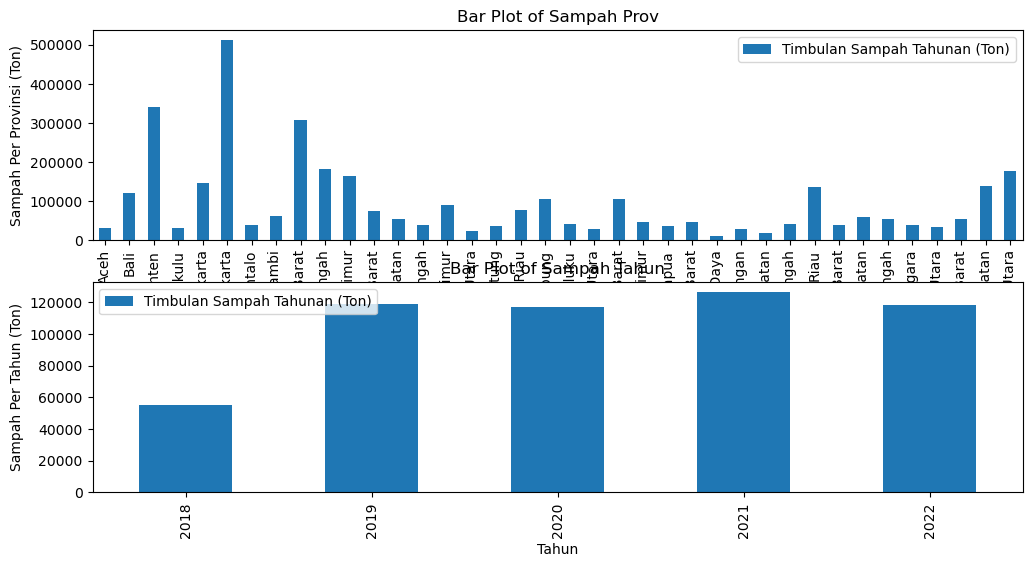

In [37]:
fig, ax = plt.subplots(2, figsize = (12, 6))
# First subplot (bar plot of sampah_prov)
sampah_prov.plot.bar(x='Provinsi', y='Timbulan Sampah Tahunan (Ton)', ax=ax[0])
ax[0].set_xlabel('Provinsi')
ax[0].set_ylabel('Sampah Per Provinsi (Ton)')
ax[0].set_title('Bar Plot of Sampah Prov')

# Second subplot (bar plot of sampah_th)
sampah_th.plot.bar(x='Tahun', y='Timbulan Sampah Tahunan (Ton)', ax=ax[1])
ax[1].set_xlabel('Tahun')
ax[1].set_ylabel('Sampah Per Tahun (Ton)')
ax[1].set_title('Bar Plot of Sampah Tahun')

In [38]:
from matplotlib.pyplot import plot as plt

# Coba Cek Hubungan Banjir dan Sampah

In [39]:
data_prov = df.copy()
data_prov = data_prov['Provinsi'].value_counts().reset_index()

In [40]:
data_prov

,index,Provinsi
0,JAWA BARAT,5144
1,JAWA TENGAH,3773
2,JAWA TIMUR,2163
3,ACEH,1287
4,SULAWESI SELATAN,858
5,KALIMANTAN SELATAN,839
6,SUMATERA BARAT,742
7,SUMATERA UTARA,599
8,SUMATERA SELATAN,459
9,BANTEN,458


In [41]:
ncn = [
    'Provinsi',
    'Jumlah']

data_prov.columns = ncn

In [42]:
data_prov = data_prov.sort_values('Provinsi').reset_index(drop = True)

In [43]:
data_prov

,Provinsi,Jumlah
0,ACEH,1287
1,BALI,440
2,BANTEN,458
3,BENGKULU,163
4,DI YOGYAKARTA,248
5,DKI JAKARTA,168
6,GORONTALO,120
7,JAMBI,269
8,JAWA BARAT,5144
9,JAWA TENGAH,3773


In [44]:
sampah_prov = sampah_prov.drop(index = [26, 28], axis = 0).reset_index(drop = True)

In [45]:
banjir_data = grouped_data.sort_values('Provinsi').reset_index(drop = True)

In [46]:
banjir_data

,Provinsi,frekuensi
0,ACEH,456
1,BALI,62
2,BANTEN,196
3,BENGKULU,106
4,DI YOGYAKARTA,29
5,DKI JAKARTA,127
6,GORONTALO,94
7,JAMBI,100
8,JAWA BARAT,917
9,JAWA TENGAH,803


In [47]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (12, 6))
ax1.bar(x = sampah_prov['Provinsi'], height = sampah_prov['Timbulan Sampah Tahunan (Ton)'])
ax2.plot(banjir_data['Provinsi'], banjir_data['frekuensi'], marker='o', linestyle='-')
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
ax1.set_xlabel('Provinsi')
ax1.set_ylabel('Timbulan Sampah Tahunan (Ton)')
ax1.set_title('Bar Plot of Timbulan Sampah Tahunan')
ax2.set_xlabel('Provinsi')
ax2.set_ylabel('Frekuensi')
ax2.set_title('Line Plot of Frekuensi Banjir')

AttributeError: 'function' object has no attribute 'subplots'

# Analisis Tree Cover Loss dan Emisi Karbon

In [ ]:
df_tcl = pd.read_csv('dataset/tree_cover_loss.csv', delimiter=';')
df_ce = pd.read_csv('dataset/carbon_emission.csv', delimiter=';')

In [ ]:
grouped_subn1_tcn = df_tcl.groupby('subnational1').mean().reset_index()

/var/folders/sy/8jr93gsd5j982hr5xdctfy5m0000gn/T/ipykernel_38096/1048358869.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_subn1_tcn = df_tcl.groupby('subnational1').mean().reset_index()


In [ ]:
grouped_subn1_tcn['avg_tc_loss_2018-2022'] = grouped_subn1_tcn[['tc_loss_ha_2018', 'tc_loss_ha_2019', 'tc_loss_ha_2020', 'tc_loss_ha_2021', 'tc_loss_ha_2022']].mean(axis=1)

In [ ]:
grouped_subn1_tcn['subnational1'] = grouped_subn1_tcn['subnational1'].replace( {'Yogyakarta' : 'DI Yogyakarta', 'Jakarta Raya' : 'DKI Jakarta', 'Bangka Belitung' : 'Kepulauan Bangka Belitung'})

In [ ]:
grouped_subn1_tcn = grouped_subn1_tcn.sort_values('subnational1').reset_index(drop = True)

In [ ]:
grouped_subn1_tcn

,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,...,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,avg_tc_loss_2018-2022
0,Aceh,28.125,2.471153e+05,2.186700e+05,2.142620e+05,5615.913043,790.673913,473.402174,511.880435,824.559783,...,2530.358696,1466.597826,2164.304348,1982.690217,1995.804348,1237.157609,1310.603261,1375.266304,1289.907609,1441.747826
1,Bali,28.125,6.211878e+04,4.256881e+04,4.453789e+04,445.777778,46.500000,34.291667,19.847222,40.500000,...,113.402778,14.861111,17.597222,29.944444,35.513889,81.708333,18.666667,22.694444,29.763889,37.669444
2,Banten,28.125,1.169028e+05,7.486977e+04,7.142472e+04,1338.625000,130.281250,217.390625,35.984375,173.140625,...,281.531250,327.843750,242.921875,428.734375,420.296875,585.593750,252.937500,235.734375,190.468750,337.006250
3,Bengkulu,28.125,1.981468e+05,1.795501e+05,1.791126e+05,6629.100000,1413.900000,1038.837500,807.800000,2590.437500,...,2023.512500,2014.012500,2425.412500,2710.500000,2452.187500,1815.137500,1622.812500,1435.425000,2381.562500,1941.425000
4,DI Yogyakarta,28.125,6.353680e+04,3.142370e+04,2.717265e+04,367.600000,15.950000,6.225000,1.675000,13.400000,...,11.175000,8.150000,13.225000,21.900000,27.600000,14.100000,11.350000,13.675000,7.400000,14.825000
5,DKI Jakarta,28.125,1.089233e+04,1.665292e+03,1.602792e+03,179.166667,0.583333,0.000000,0.000000,0.166667,...,0.000000,0.020833,0.020833,0.145833,0.000000,0.020833,0.062500,0.166667,0.000000,0.050000
6,Gorontalo,28.125,1.720267e+05,1.456791e+05,1.425609e+05,918.857143,496.535714,1136.892857,399.232143,985.750000,...,1493.964286,1921.535714,1586.625000,1133.375000,1153.714286,1588.535714,436.035714,316.821429,405.767857,780.175000
7,Jambi,28.125,4.451216e+05,4.068439e+05,3.967410e+05,18582.363636,4241.568182,4073.068182,1942.670455,8774.863636,...,7012.568182,5490.704545,14222.772727,7786.113636,6318.954545,6117.818182,7085.500000,6616.056818,6841.306818,6595.927273
8,Jawa Barat,28.125,1.372545e+05,8.008298e+04,7.777320e+04,1434.925926,250.078704,140.722222,72.689815,131.657407,...,138.143519,129.106481,134.754630,208.805556,168.129630,259.388889,127.930556,95.680556,95.731481,149.372222
9,Jawa Tengah,28.125,9.565778e+04,4.805306e+04,4.565611e+04,838.194444,73.250000,51.170139,21.552083,96.170139,...,81.975694,52.260417,63.041667,96.100694,72.131944,78.531250,77.243056,59.364583,59.152778,69.284722


In [ ]:
grouped_subn1_ce = df_ce.groupby('subnational1').mean().reset_index()
grouped_subn1_ce['avg_ce_2018-2022'] = grouped_subn1_ce[['gfw_forest_carbon_gross_emissions_2018__Mg_CO2e', 'gfw_forest_carbon_gross_emissions_2019__Mg_CO2e', 'gfw_forest_carbon_gross_emissions_2020__Mg_CO2e', 'gfw_forest_carbon_gross_emissions_2021__Mg_CO2e', 'gfw_forest_carbon_gross_emissions_2022__Mg_CO2e']].mean(axis=1)
grouped_subn1_ce['subnational1'] = grouped_subn1_ce['subnational1'].replace( {'Yogyakarta' : 'DI Yogyakarta', 'Jakarta Raya' : 'DKI Jakarta', 'Bangka Belitung' : 'Kepulauan Bangka Belitung'})
grouped_subn1_ce = grouped_subn1_ce.sort_values('subnational1').reset_index(drop = True)
grouped_subn1_ce


/var/folders/sy/8jr93gsd5j982hr5xdctfy5m0000gn/T/ipykernel_38096/3121912457.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_subn1_ce = df_ce.groupby('subnational1').mean().reset_index()


,subnational1,umd_tree_cover_density_2000__threshold,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__Mg_C,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,gfw_forest_carbon_gross_emissions_2002__Mg_CO2e,...,gfw_forest_carbon_gross_emissions_2014__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e,avg_ce_2018-2022
0,Aceh,28.125,2.186700e+05,2.828953e+07,117.125000,9.004422e+05,5.198974e+05,3.805449e+05,4.476850e+05,2.764576e+05,...,1.492913e+06,8.458580e+05,1.203529e+06,1.096503e+06,1.131596e+06,7.184151e+05,7.535259e+05,7.776263e+05,6.997459e+05,8.161819e+05
1,Bali,28.125,4.256881e+04,4.303349e+06,92.902778,2.182385e+04,2.342440e+05,-2.124201e+05,2.760119e+04,2.014663e+04,...,4.621341e+04,7.165667e+03,1.021219e+04,1.530081e+04,2.064307e+04,4.078044e+04,1.157144e+04,1.269989e+04,1.711093e+04,2.056116e+04
2,Banten,28.125,7.486977e+04,6.958593e+06,75.000000,1.429780e+05,3.986060e+05,-2.556281e+05,7.362150e+04,1.237312e+05,...,1.598431e+05,1.821200e+05,1.319864e+05,2.380199e+05,2.399656e+05,3.122163e+05,1.452699e+05,1.357558e+05,1.076474e+05,1.881710e+05
3,Bengkulu,28.125,1.795501e+05,2.303052e+07,115.887500,1.310412e+06,6.644289e+05,6.459827e+05,9.745675e+05,7.211839e+05,...,1.338979e+06,1.376167e+06,1.620637e+06,1.814503e+06,1.666667e+06,1.170325e+06,1.082629e+06,9.383231e+05,1.596284e+06,1.290846e+06
4,DI Yogyakarta,28.125,3.142370e+04,2.085988e+06,71.000000,5.732067e+03,1.228053e+05,-1.170734e+05,7.864600e+03,2.952133e+03,...,4.052467e+03,3.172533e+03,5.266000e+03,8.679867e+03,9.846933e+03,5.215933e+03,4.504533e+03,5.841333e+03,2.964267e+03,5.674600e+03
5,DKI Jakarta,28.125,1.665292e+03,1.714198e+04,37.520833,3.538889e+01,2.279833e+03,-2.244389e+03,1.105000e+02,1.111111e+00,...,0.000000e+00,5.055556e+00,0.000000e+00,3.600000e+01,0.000000e+00,0.000000e+00,2.444444e+00,0.000000e+00,0.000000e+00,4.888889e-01
6,Gorontalo,28.125,1.456791e+05,2.096558e+07,118.214286,5.641858e+05,3.200981e+05,2.440878e+05,3.214771e+05,7.479643e+05,...,1.094112e+06,1.260075e+06,1.033323e+06,6.908029e+05,7.207928e+05,9.281446e+05,2.893980e+05,1.980434e+05,2.570485e+05,4.786855e+05
7,Jambi,28.125,4.068439e+05,4.435149e+07,107.704545,5.503927e+06,2.129082e+06,3.374846e+06,2.988114e+06,3.200286e+06,...,4.908468e+06,3.717388e+06,1.138285e+07,4.974945e+06,3.890566e+06,3.782696e+06,4.864276e+06,3.842362e+06,4.266322e+06,4.129244e+06
8,Jawa Barat,28.125,8.008298e+04,7.421308e+06,83.009259,8.381143e+04,3.385264e+05,-2.547149e+05,1.676524e+05,8.986760e+04,...,7.715778e+04,6.793065e+04,7.883021e+04,1.081111e+05,8.496465e+04,1.279306e+05,7.035490e+04,5.457600e+04,5.417491e+04,7.840021e+04
9,Jawa Tengah,28.125,4.805306e+04,3.922220e+06,82.236111,3.789427e+04,2.164716e+05,-1.785772e+05,4.568806e+04,2.795986e+04,...,3.915642e+04,2.497982e+04,3.569734e+04,5.284705e+04,3.809383e+04,4.025082e+04,4.219158e+04,3.512610e+04,3.518844e+04,3.817016e+04


# Coba Cek Korelasi banjir dengan Tree Cover Loss

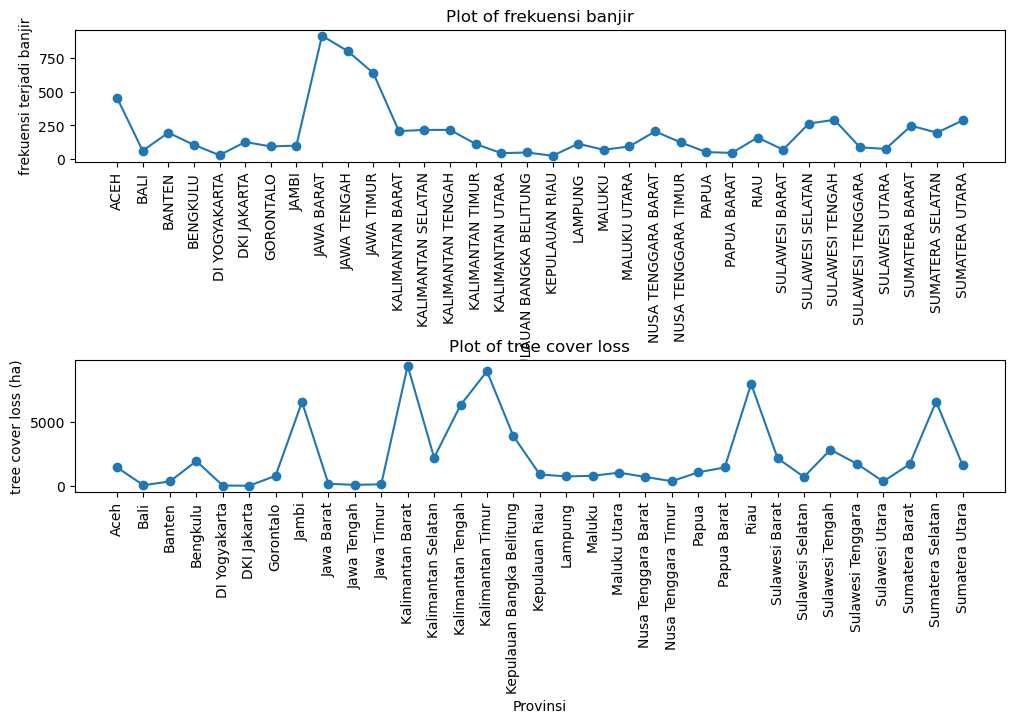

In [ ]:
# Create subplots with a common x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

# Plot the data for df1 on the first subplot (ax1)
ax1.plot(banjir_data['Provinsi'], banjir_data['frekuensi'], marker='o', linestyle='-')
ax1.set_ylabel('frekuensi terjadi banjir')
ax1.set_title('Plot of frekuensi banjir')
ax1.tick_params(axis='x', rotation=90)

# Plot the data for df2 on the second subplot (ax2)
ax2.plot(grouped_subn1_tcn['subnational1'], grouped_subn1_tcn['avg_tc_loss_2018-2022'], marker='o', linestyle='-')
ax2.set_xlabel('Provinsi')
ax2.set_ylabel('tree cover loss (ha)')
ax2.set_title('Plot of tree cover loss')
ax2.tick_params(axis='x', rotation=90)

plt.subplots_adjust(hspace=1.5)

# Coba Cek Korelasi Tanah Longsor dengan Sampah dan tcloss

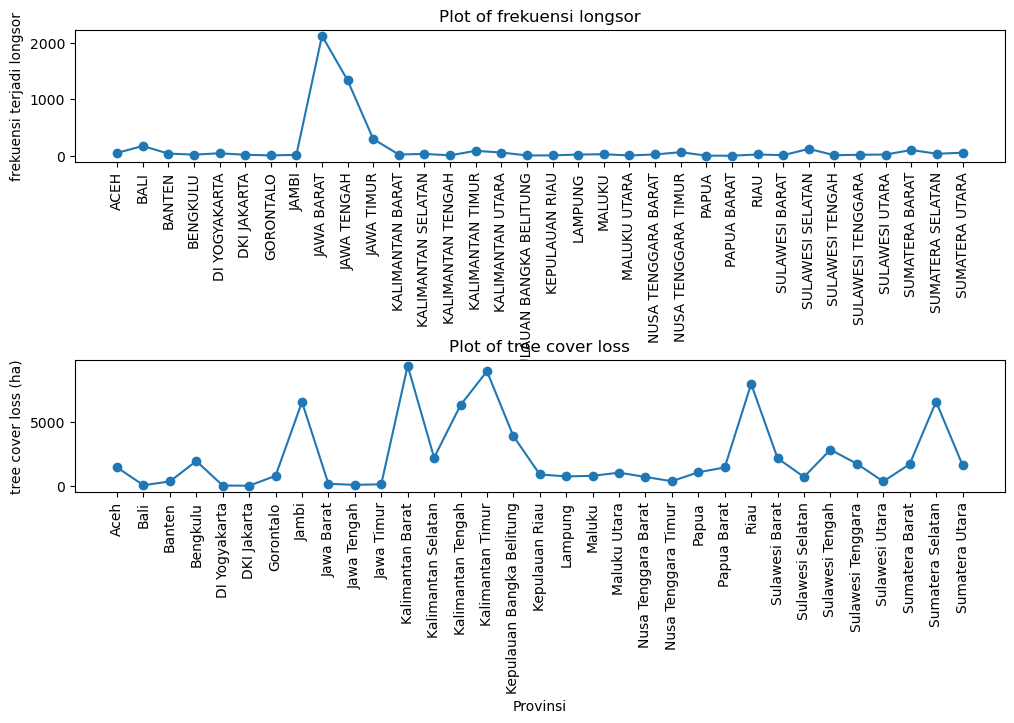

In [ ]:
# Create subplots with a common x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

# Plot the data for df1 on the first subplot (ax1)
ax1.plot(grouped_longsor['Provinsi'], grouped_longsor['frekuensi'], marker='o', linestyle='-')
ax1.set_ylabel('frekuensi terjadi longsor')
ax1.set_title('Plot of frekuensi longsor')
ax1.tick_params(axis='x', rotation=90)

# Plot the data for df2 on the second subplot (ax2)
ax2.plot(grouped_subn1_tcn['subnational1'], grouped_subn1_tcn['avg_tc_loss_2018-2022'], marker='o', linestyle='-')
ax2.set_xlabel('Provinsi')
ax2.set_ylabel('tree cover loss (ha)')
ax2.set_title('Plot of tree cover loss')
ax2.tick_params(axis='x', rotation=90)

plt.subplots_adjust(hspace=1.5)

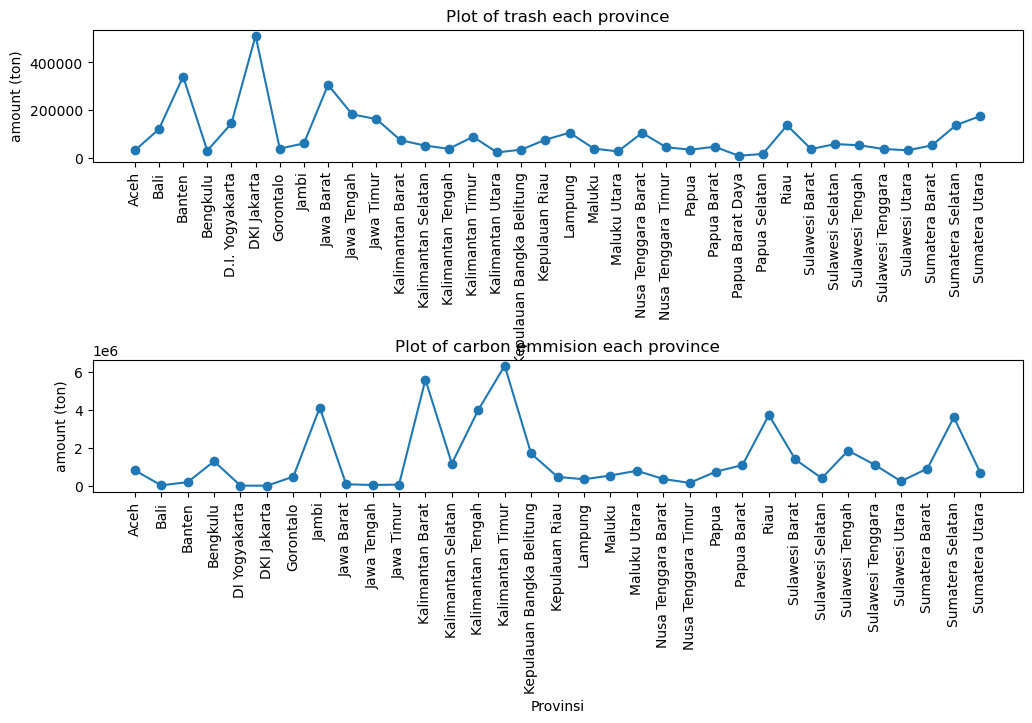

In [ ]:
# Create subplots with a common x-axis
fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(12, 6))

ax3.plot(sampah_prov['Provinsi'], sampah_prov['Timbulan Sampah Tahunan (Ton)'], marker='o', linestyle='-')
ax3.set_xlabel('Provinsi')
ax3.set_ylabel('amount (ton)')
ax3.set_title('Plot of trash each province')
ax3.tick_params(axis='x', rotation=90)

ax4.plot(grouped_subn1_ce['subnational1'], grouped_subn1_ce['avg_ce_2018-2022'], marker='o', linestyle='-')
ax4.set_xlabel('Provinsi')
ax4.set_ylabel('amount (ton)')
ax4.set_title('Plot of carbon emmision each province')
ax4.tick_params(axis='x', rotation=90)

plt.subplots_adjust(hspace=1.5)

# Pearson Correlation Coefficient

In [ ]:
# Calculate the correlation between 'frekuensi' and 'avg_tc_loss_2018-2022'
corr_banjir_tcloss = banjir_data['frekuensi'].corr(grouped_subn1_tcn['avg_tc_loss_2018-2022'])
corr_banjir_sampah = banjir_data['frekuensi'].corr(sampah_prov['Timbulan Sampah Tahunan (Ton)'])
corr_longsor_tcloss = grouped_longsor['frekuensi'].corr(sampah_prov['Timbulan Sampah Tahunan (Ton)'])
corr_carbon_sampah = grouped_subn1_ce['avg_ce_2018-2022'].corr(sampah_prov['Timbulan Sampah Tahunan (Ton)'])
# # Create a DataFrame to hold the correlation value
# correlation_df = pd.DataFrame(data={'Correlation': [correlation]})

# # Create a heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(correlation_df, annot=True, cmap='Blues', cbar=False, linewidths=0.5)
# plt.title('Correlation Heatmap')

# # Show the heatmap
# plt.show()
print(corr_banjir_tcloss, corr_banjir_sampah, corr_longsor_tcloss, corr_carbon_sampah)

-0.16649659265924577 0.3540413697193969 0.011340167245882292 -0.27099816001733684


In [87]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 4.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [108]:
import os

# Create an empty list to store DataFrames
dfs = []

# Directory containing the CSV files
directory = '/Users/trista/Documents/GitHub/reswaratrista/DAD-Final_PlatL/dataset/historical weather 2018 - 2020/'

# List of CSV file names (replace with your file names)
province_names = [
    "Aceh", "Bali", "Banten", "Bengkulu", "Yogyakarta", "Jakarta Raya", "Gorontalo", 
    "Jambi", "Jawa Barat", "Jawa Tengah", "Jawa Timur", "Kalimantan Barat", "Kalimantan Selatan", 
    "Kalimantan Tengah", "Kalimantan Timur", "Kalimantan Utara", "Kepulauan Bangka Belitung", "Kepulauan Riau", 
    "Lampung", "Maluku", "Maluku Utara", "Nusa Tenggara Barat", "Nusa tenggara Timur", "Papua", 
    "Papua Barat", "Riau", "Sulawesi Barat", "Sulawesi Selatan", "Sulawesi Tengah", "Sulawesi Tenggara", 
    "Sulawesi Utara", "Sumatera Barat", "Sumatera Selatan", "Sumatera Utara"
]

# Create the list of CSV files
csv_files = [f"weather {province} 2018 - 2020.xlsx" for province in province_names]

for csv_file in csv_files:
    # Load the CSV into a DataFrame
    df = pd.read_excel(os.path.join(directory, csv_file), skiprows=3)
    
    # Extract the province name from the filename
    file_parts = csv_file.split(' ')
    province_parts = file_parts[1:-3]  # Exclude 'weather' and '2020-2023'
    
    # Combine the province parts to get the province name
    province_name = ' '.join(province_parts)
    
    # Add a 'Province' column with the province name
    df['Province'] = province_name
    
    # Append the DataFrame to the list
    dfs.append(df)


# Concatenate all DataFrames into a single DataFrame

merged_df = pd.concat(dfs, axis=0, ignore_index=True)


In [109]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62084 entries, 0 to 62083
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time                      62084 non-null  datetime64[ns]
 1   weathercode (wmo code)    62084 non-null  int64         
 2   temperature_2m_mean (°C)  62084 non-null  float64       
 3   rain_sum (mm)             62084 non-null  float64       
 4   Unnamed: 4                0 non-null      float64       
 5   Unnamed: 5                0 non-null      float64       
 6   Province                  62084 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.3+ MB


In [110]:
merged_df['weathercode (wmo code)'] = merged_df['weathercode (wmo code)'].fillna(0)

# Calculate the average temperature for each province
average_temperature_by_province = merged_df.groupby('Province')['temperature_2m_mean (°C)'].transform('mean').round(1)

# Fill missing values in the column with the province's average temperature
merged_df['temperature_2m_mean (°C)'].fillna(average_temperature_by_province, inplace=True)


In [112]:
# Calculate the average temperature for each province
avg2 = merged_df.groupby('Province')['rain_sum (mm)'].transform('mean')

# Fill missing values in the column with the province's average temperature
merged_df['rain_sum (mm)'].fillna(avg2, inplace=True)


In [113]:
merged_df['Province'] = merged_df['Province'].replace( {'DI Yogyakarta' : 'Yogyakarta', 'DKI Jakarta' : 'Jakarta Raya'})
merged_df = merged_df.drop(['Unnamed: 4', 'Unnamed: 5'], axis = 1)

In [114]:
merged_df.to_csv('cleaned_dataset/weather_history.csv')